# Note
This data originated from alpha_diveristy.ipynb.  

# Adding meta data
The csv from alpha_diveristy.ipynb was altered to create column headers of "merge" and "otu_count" and then merged with meta data as follows

In [1]:
meta<-read.csv('meta.csv')
dim(meta)
alpha<-read.csv('otu_count.csv')
dim(alpha)

[1] 397  12

[1] 396   2

In [2]:
div<-merge(meta,alpha,by="merge")
dim(div)

[1] 396  13

In [3]:
write.table(div,'alpha_diversity.csv', sep=',',row.names=F, col.names=T)

# ANOVA of Alpha Diversity
csv from previous was used to analyze trends in feature count of isolate groups

In [4]:
div<-read.csv('alpha_diversity.csv')
head(div)

,merge,filename.x,TYPE,BOX_AND_CODE,STATE,fullest_code,type_branch,rep,cluster,Region,zip_code,combined,otu_count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,101-H7a,Vicky1-a1-101-H7A.mzXML,isolate,101-H7,SC,Vicky1-a1-101-H7A,branch_u,a,clu6_1,Southeast,29203,clu6_1-branch_u,1346
2,101-H7b,Vicky1-a1-101-H7B.mzXML,isolate,101-H7,SC,Vicky1-a1-101-H7B,branch_u,b,clu6_1,Southeast,29203,clu6_1-branch_u,1264
3,133-H4a,Vicky1-h6-133-H4A.mzXML,isolate,133-H4,TX,Vicky1-h6-133-H4A,branch_u,a,clu6_1,South,79928,clu6_1-branch_u,331
4,133-H4b,Vicky1-h6-133-H4B.mzXML,isolate,133-H4,TX,Vicky1-h6-133-H4B,branch_u,b,clu6_1,South,79928,clu6_1-branch_u,387
5,134-D5a,Vicky1-c12-134-D5A.mzXML,isolate,134-D5,NM,Vicky1-c12-134-D5A,branch_u,a,clu6_1,Southwest,87105,clu6_1-branch_u,580
6,134-D5b,Vicky1-c12-134-D5B.mzXML,isolate,134-D5,NM,Vicky1-c12-134-D5B,branch_u,b,clu6_1,Southwest,87105,clu6_1-branch_u,332


In [5]:
ANOVA_clade<-aov(div$otu_count~div$type_branch)
summary(ANOVA_clade)

                 Df   Sum Sq Mean Sq F value Pr(>F)    
div$type_branch   4  3921202  980300   29.48 <2e-16 ***
Residuals       391 13002359   33254                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [6]:
Tukey_clade<-TukeyHSD(ANOVA_clade)

In [7]:
Tukey_clade

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = div$otu_count ~ div$type_branch)

$`div$type_branch`
                        diff        lwr        upr     p adj
branch_v-branch_u -177.85952 -241.33561 -114.38344 0.0000000
branch_w-branch_u -189.39030 -281.42774  -97.35286 0.0000003
branch_x-branch_u -300.97401 -404.56529 -197.38274 0.0000000
branch_y-branch_u  -84.45753 -184.68228   15.76723 0.1440274
branch_w-branch_v  -11.53078 -112.77318   89.71162 0.9979353
branch_x-branch_v -123.11449 -234.96388  -11.26510 0.0227208
branch_y-branch_v   93.40199  -15.33684  202.14083 0.1304223
branch_x-branch_w -111.58371 -241.78341   18.61599 0.1319886
branch_y-branch_w  104.93277  -22.60472  232.47027 0.1620896
branch_y-branch_x  216.51648   80.40596  352.62700 0.0001618


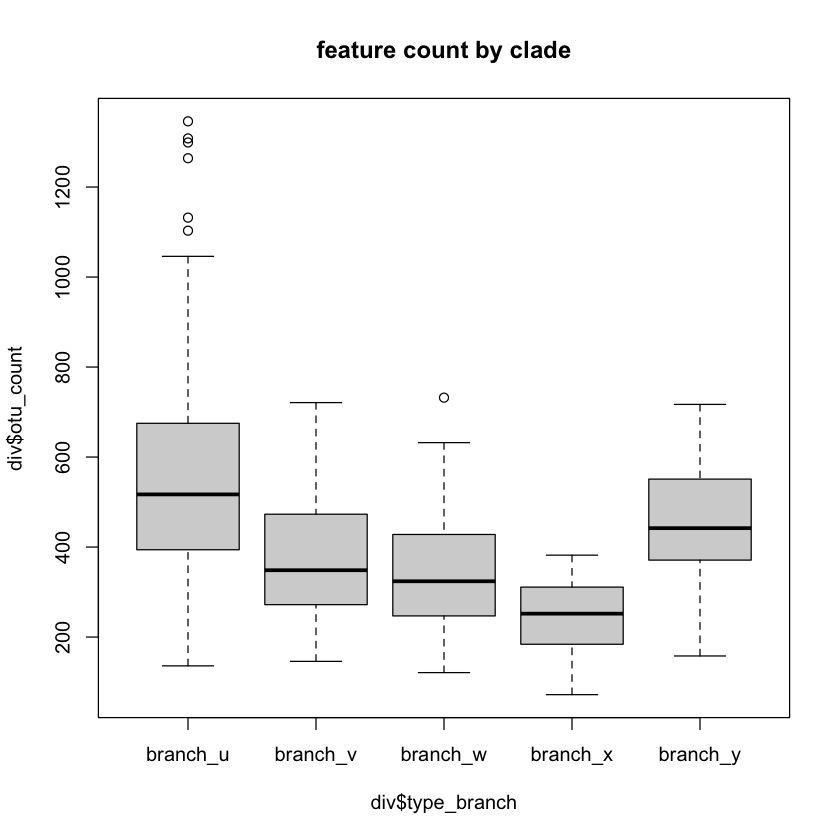

In [8]:
boxplot(div$otu_count~div$type_branch,main="feature count by clade")

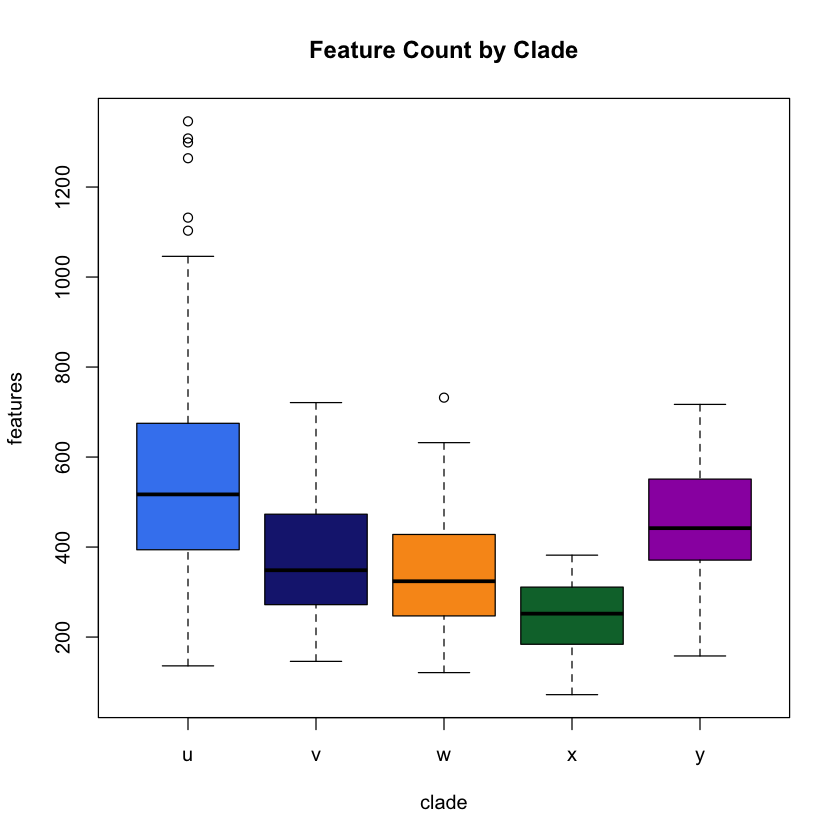

In [2]:
boxplot(div$otu_count~div$type_branch,main="Feature Count by Clade", ylab="features", xlab="clade",
        col=(c("#4186f0","#1a237e", "#f8981b", "#097138","#9b27b0")))

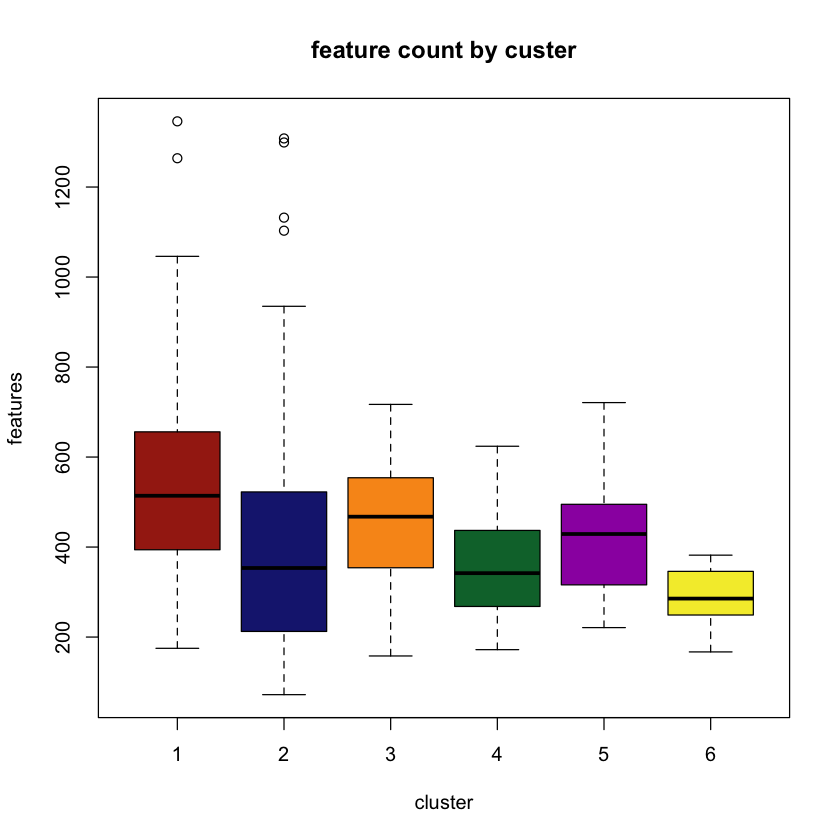

In [6]:
boxplot(div$otu_count~div$cluster,main="feature count by custer", ylab="features",xlab="cluster",
        col=(c('#A52714','#1A237E','#F8971B','#097138','#9C27B0','#F4EB37')))

In [6]:
div<-read.csv('trimmed_all_alpha_diversity.csv')
head(div)

,merge,X,filename,combo,BOX_AND_CODE.x,filename.x,TYPE,BOX_AND_CODE.y,STATE,fullest_code,⋯,rep,cluster,Region,zip_code,combined,SHANNON_DIV,chao1,menhinick,margalef,otu_count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,101-H7a,Vicky1.a1.101.H7A.mzXML.Peak.area,Vicky1-a1-101-H7A.mzXML,branch_u-cluster_1,101-H7,Vicky1-a1-101-H7A.mzXML,isolate,101-H7,SC,Vicky1-a1-101-H7A,⋯,a,1,Southeast,29203,1-u,10.394463,906531,36.68787,186.67870,1346
2,101-H7b,Vicky1.a1.101.H7B.mzXML.Peak.area,Vicky1-a1-101-H7B.mzXML,branch_u-cluster_1,101-H7,Vicky1-a1-101-H7B.mzXML,isolate,101-H7,SC,Vicky1-a1-101-H7B,⋯,b,1,Southeast,29203,1-u,10.303781,799480,35.55278,176.84032,1264
3,133-H4a,Vicky1.h6.133.H4A.mzXML.Peak.area,Vicky1-h6-133-H4A.mzXML,branch_u-cluster_1,133-H4,Vicky1-h6-133-H4A.mzXML,isolate,133-H4,TX,Vicky1-h6-133-H4A,⋯,a,1,South,79928,1-u,8.370687,54946,18.19341,56.87578,331
4,133-H4b,Vicky1.h6.133.H4B.mzXML.Peak.area,Vicky1-h6-133-H4B.mzXML,branch_u-cluster_1,133-H4,Vicky1-h6-133-H4B.mzXML,isolate,133-H4,TX,Vicky1-h6-133-H4B,⋯,b,1,South,79928,1-u,8.596190,75078,19.67232,64.78222,387
5,134-D5a,Vicky1.c12.134.D5A.mzXML.Peak.area,Vicky1-c12-134-D5A.mzXML,branch_u-cluster_1,134-D5,Vicky1-c12-134-D5A.mzXML,isolate,134-D5,NM,Vicky1-c12-134-D5A,⋯,a,1,Southwest,87105,1-u,9.179909,168490,24.08319,90.99441,580
6,134-D5b,Vicky1.c12.134.D5B.mzXML.Peak.area,Vicky1-c12-134-D5B.mzXML,branch_u-cluster_1,134-D5,Vicky1-c12-134-D5B.mzXML,isolate,134-D5,NM,Vicky1-c12-134-D5B,⋯,b,1,Southwest,87105,1-u,8.375039,55278,18.22087,57.01848,332


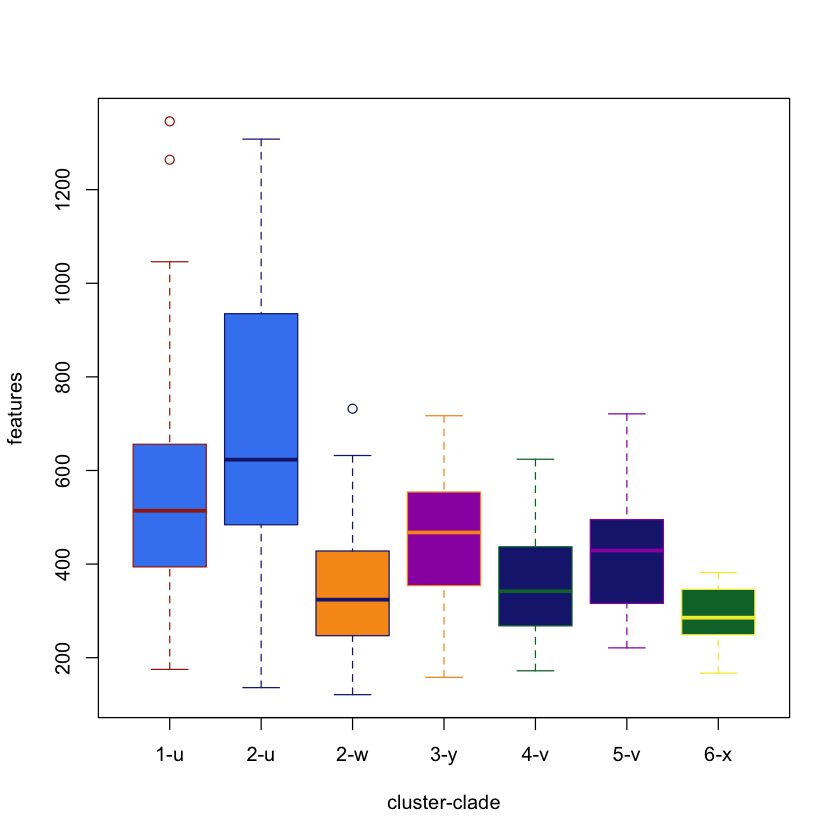

In [7]:
# col=(c("u: #4186f0","v: #1a237e", "w: #f8981b", "x: #097138","y: #9b27b0")))
boxplot(div$otu_count~div$combined,
        #main="feature count by cluster and clade", 
        ylab="features",xlab="cluster-clade",
        col=(c('#4186f0','#4186f0','#f8981b','#9b27b0','#1a237e', '#1a237e','#097138')),
       border=c('#A52714', '#1A237E', '#1A237E', '#F8971B', '#097138', '#9C27B0','#F4EB37')
        )

In [22]:
div<-read.csv('test.csv')
head(div)

combined,otu_count
1-u,1346
1-u,1264
1-u,331
1-u,387
1-u,580
1-u,332


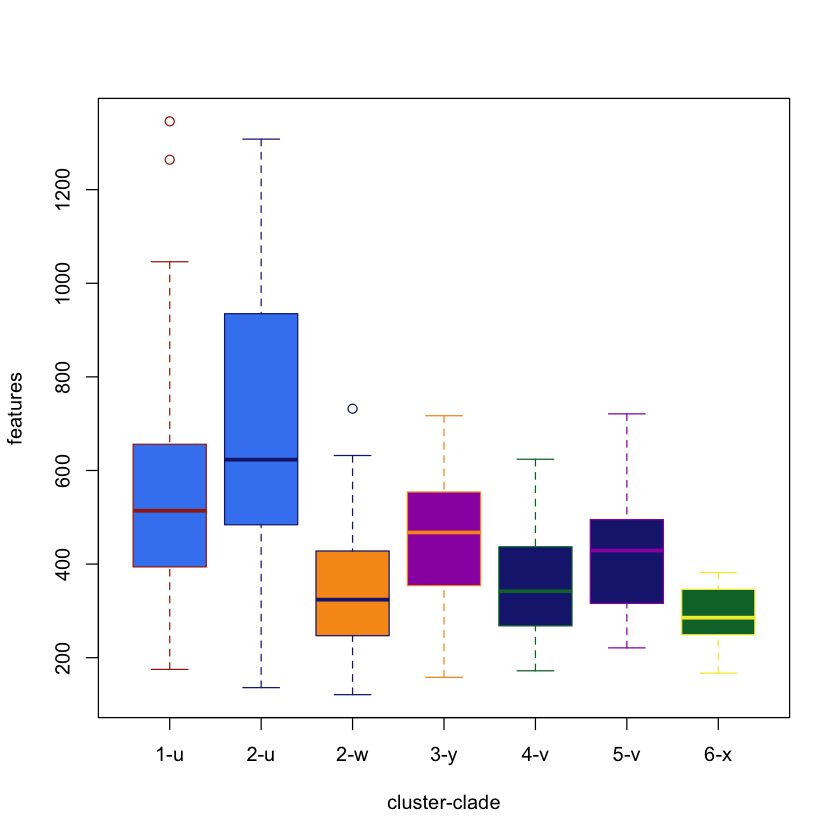

In [8]:
# col=(c("u: #4186f0","v: #1a237e", "w: #f8981b", "x: #097138","y: #9b27b0")))
boxplot(div$otu_count~div$combined,
        #main="feature count by cluster and clade", 
        ylab="features",xlab="cluster-clade",
        col=(c('#4186f0','#4186f0','#f8981b','#9b27b0','#1a237e', '#1a237e','#097138')),
       border=c('#A52714', '#1A237E', '#1A237E', '#F8971B', '#097138', '#9C27B0','#F4EB37')
        )